# Enunciado

Construya una red neuronal con el objetivo de realizar la predicción sobre la data asociada a los precios de las propiedades de Boston.

# Fuente y descripción de los datos

Este conjunto de datos se obtuvo del repositorio StatLib. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

La variable objetivo es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares ($100,000).

Este conjunto de datos se derivó del censo de EE. UU. de 1990, utilizando una fila por grupo de bloques censales. Un grupo de bloque es la unidad geográfica más pequeña para la que la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloque suele tener una población de 600 a 3000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que la cantidad promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.

Características del conjunto de datos:

Número de instancias 
20640

Número de atributos 
8 atributos numéricos, predictivos y el objetivo

Información de atributo 
* MedInc Ingreso promedio  

* HouseAge edad promedio de la casa 

* AveRooms Número promedio de habitaciones por hogar

* AveBedrms número promedio de dormitorios por hogar

* Population Población 

* AveOccup número promedio de miembros del hogar

* Latitude Latitud 

* Longitude Longitud 


Deberá abordar las etapas de la red


Importar librerías

In [1]:
# Acá su código
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

Cargar datos

In [2]:
#Acá su código
from sklearn.datasets import fetch_california_housing
df_boston = fetch_california_housing(as_frame=True)

Análisis de los datos : Explorar los datos con al menos 3 técnicas diferentes

In [3]:
#Acá su código
df = pd.DataFrame(df_boston.data, columns= df_boston.feature_names)
df['MedHouseValue'] = pd.Series(df_boston.target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Realizamos la descripcion de los datos para ver los valores como el minimo y 
# el maximo de los datos que nos son relevantes como el valor promedio
# de las casas "MedInc" (en cientos de miles de dolares).
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Se muestran los datos estadisticos de cada columna, como el promedio, la moda, los valores minimos y maximos de cada una de las variables, los cuales nos ayudan a tener una nocion de si existiesen outliers o datos que se escapan de la realidad.

In [5]:
# Analizamos las columnas que contiene nuestro dataset para definir cuales ocuparemos
# y cuales quedaran fuera del mismo.
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

Identificamos 8 columnas, de las cuales a simple vista notamos que podemos sacar información de 6 de estas, quedando fuera la longitud la latitud ya que no nos entregan un valor que pueda definir el precio de las viviendas.

In [6]:
# Analizamos los tipos de datos que tenemos y si existen nulls dentro
# del dataset para ser eliminados o reemplazados por el promedio.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Evidenciamos que todos los datos pertenecen a la categoria de float y no existen nulos dentro del dataset.

Aplicar preprocesamiento a los datos : Al menos una técnica será necesaria

In [7]:
# Multiplicamos por 100.000 las columnas "Med Inc" (Ingreso Promedio) y 
# de la variable "MedHouseValue" (Valor promedio de la casa) ya que estaban
# medidas en cientos de miles de dolares y esto nos ayudará a un mejor analisis.
# df['MedInc'] = df['MedInc']*100000
# df['MedHouseValue'] = df['MedHouseValue']*100000
# df

# Disclaimer: al transformar las medidas de MedInc y MedHouseValue en cientos de
# miles de dolares, el modelo se ve afectado negativamente, ya que el loss
# nos arroja un valor inmenso (1777654433 aproximadamente) y un accuracy de 0
# por lo cual se decidio omitir este procesamiento de los datos y dejar los
# valores como venian por defecto en el dataset.

In [8]:
#Eliminamos las columnas que no usaremos para realizar la prediccion.
df = df.drop(['Latitude','Longitude'], axis=1)

In [9]:
# Redondeamos los valores a datos enteros para tener una prediccion más precisa.
# df = df.apply(np.ceil)
# loss: 0.3607 - accuracy: 0.1776

# Disclaimer : al usar el redondeo, el accuracy se ve afectado de forma negativa
# el loss se ve afectado positivamente, pero igualmente sigue siendo un metodo
# menos preciso que el que se muestra a continuacion

In [10]:
# Transformamos a int los valores del DF
df = df.astype(int)


Tratamiento de outliers.

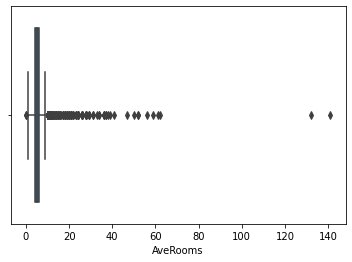

In [11]:
# Validamos la columna "AveRooms" en un grafico boxplot
# para verificar la existencia de outliers.
import seaborn as sns
sns.boxplot(x = df['AveRooms'])
plt.show()

In [12]:
#Realizamos la descripcion de la columna "AveRooms".
df['AveRooms'].describe()

count    20640.000000
mean         4.933818
std          2.489414
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max        141.000000
Name: AveRooms, dtype: float64

Podemos evidenciar que existen datos atipicos o outliers como el dato "142" que nos indica que existe una cada que posee en promedio 142 habitaciones, por lo que procedemos a ver ese dato en especficico con el metodo "loc"

In [13]:
# Buscamos la fila que contiene el valor de "AveRooms" = 142
print(df.loc[df['AveRooms']>140])

      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
1914       1        33       141         25          30         2   

      MedHouseValue  
1914              5  


Evidenciamos que el dato arrojado arriba es atipico, ya que tenemos una casa con un valor de $500k con 142 habitaciones y 26 dormitorios, la cual es habitada solo por 3 personas, esto nos causa mucha rareza y puede ser un dato que haga que el modelo funcione de mala manera por lo cual será un dato que eliminaremos.

Para eliminar los valores atipicos o outliers usaremos la regla de Tukey o tambien conocido como IQR (Rango intercuartilico en español) que consiste en restar el Q3 - Q1 

* Quedando la siguiente formula = (IQR = Q3 — Q1)

* Obtendremos el limite inferior con la formula Q1–1.5 * IQR.

* Obtendremos el limite superior con la formula Q3 + 1.5 * IQR

In [14]:
# Detectamos el primer cuartil
df['AveRooms'].quantile(.25)

4.0

In [15]:
# Detectamos el tercer cuartil
df['AveRooms'].quantile(.75)

6.0

In [16]:
# Almacenamos los cuartiles en sus respectivas variables
# Q1 Y Q3 respectivamente y luego definimos la variable IQR para 
# realizar la formula antes descrita.
Q1 = df['AveRooms'].quantile(.25)
Q3 = df['AveRooms'].quantile(.75)
IQR = Q3 - Q1

In [17]:
# Validamos el valor de IQR.
IQR

2.0

In [18]:
# Iniciamos las variables de limite inferior y limite superior
# y definimos las formulas anteriormente descritas.
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [19]:
# Validamos el limite inferior.
lower_lim

1.0

In [20]:
# Validamos el limite superior.
upper_lim

9.0

In [21]:
# A continuacion identificamos los outliers dentro de la columna "AveRooms"
# y se guardan en sus respectivas variables (outliers low y up)
outliers_low = (df['AveRooms'] < lower_lim)
outliers_up = (df['AveRooms'] > upper_lim)

In [22]:
# Obtenemos la cantidad de datos sin valores atipicos.
len(df['AveRooms']) - (len(df['AveRooms'][outliers_low]) + len(df['AveRooms'][outliers_up]))

20411

In [23]:
# Obtenemos los datos con valores atipicos.
df['AveRooms'][(outliers_low | outliers_up)]

1023     10
1024     29
1030     10
1102     31
1233     16
         ..
20093    24
20094    37
20110    11
20112    11
20113    17
Name: AveRooms, Length: 229, dtype: int64

In [24]:
# Obtenemos los datos sin valores atipicos.
df['AveRooms'][~(outliers_low | outliers_up)]

0        6
1        6
2        8
3        5
4        6
        ..
20635    5
20636    6
20637    5
20638    5
20639    5
Name: AveRooms, Length: 20411, dtype: int64

In [25]:
# Obtenemos nuestro df con los datos atipicos aun en el.
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseValue
0,8,41,6,1,322,2,4
1,8,21,6,0,2401,2,3
2,7,52,8,1,496,2,3
3,5,52,5,1,558,2,3
4,3,52,6,1,565,2,3
...,...,...,...,...,...,...,...
20635,1,25,5,1,845,2,0
20636,2,18,6,1,356,3,0
20637,1,17,5,1,1007,2,0
20638,1,18,5,1,741,2,0


In [26]:
# Almacenamos nuestro dataset sin datos atipicos.
df = df[~(outliers_low) | (outliers_up)]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseValue
0,8,41,6,1,322,2,4
1,8,21,6,0,2401,2,3
2,7,52,8,1,496,2,3
3,5,52,5,1,558,2,3
4,3,52,6,1,565,2,3
...,...,...,...,...,...,...,...
20635,1,25,5,1,845,2,0
20636,2,18,6,1,356,3,0
20637,1,17,5,1,1007,2,0
20638,1,18,5,1,741,2,0


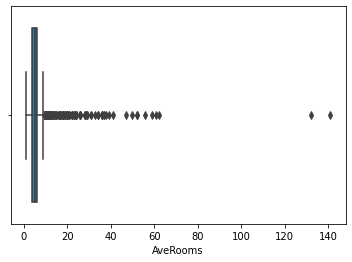

In [27]:
# Validamos que se haya realizado la eliminación de valores atipicos
sns.boxplot(x = df['AveRooms'])
plt.show()

Separar datos de entrenamiento y prueba

In [28]:
#Separar la columna objetivo del dataset
X = df.drop(['MedHouseValue'],1)
y = df['MedHouseValue']

#Ahora viene separar los datos entre entrenamiento y prueba, usando los 4 conjuntos
from sklearn.model_selection import train_test_split

#test_split = 0.2 significa que se separan 80:20 y random_state solo es para darle una semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (16510, 6)
X_test shape:  (4128, 6)
y_train shape:  (16510,)
y_test shape:  (4128,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
# Validamos los datos separados "X".
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
4519,1,44,3,1,1998,3
29,1,52,4,1,395,2
7339,2,23,3,1,1977,4
1067,3,52,4,0,1107,11
5082,2,44,4,0,811,2
...,...,...,...,...,...,...
16842,5,28,6,1,2683,3
11865,5,10,15,2,247,2
17095,3,36,4,1,1117,2
8368,3,42,5,1,1785,2


In [30]:
# Validamos los datos de "Y"
y_train

4519     1
29       1
7339     1
1067     1
5082     0
        ..
16842    3
11865    1
17095    3
8368     1
17532    3
Name: MedHouseValue, Length: 16510, dtype: int64

In [31]:
# Realizamos la normalización de los datos "X" ya separados.
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler().fit(X_train)
X_train_n = MinMax.transform(X_train)
X_test_n = MinMax.transform(X_test)

In [32]:
# Validamos los datos de entrenamiento "X" normalizados.
X_train_n

array([[6.66666667e-02, 8.43137255e-01, 1.52671756e-02, 2.94117647e-02,
        5.59152443e-02, 2.41351569e-03],
       [6.66666667e-02, 1.00000000e+00, 2.29007634e-02, 2.94117647e-02,
        1.09868550e-02, 1.60901046e-03],
       [1.33333333e-01, 4.31372549e-01, 1.52671756e-02, 2.94117647e-02,
        5.53266627e-02, 3.21802092e-03],
       ...,
       [2.00000000e-01, 6.86274510e-01, 2.29007634e-02, 2.94117647e-02,
        3.12228482e-02, 1.60901046e-03],
       [2.00000000e-01, 8.03921569e-01, 3.05343511e-02, 2.94117647e-02,
        4.99453460e-02, 1.60901046e-03],
       [0.00000000e+00, 3.72549020e-01, 7.63358779e-03, 2.94117647e-02,
        2.37674823e-02, 8.04505229e-04]])

In [33]:
# Validamos los datos de prueba "X" normalizados
X_test_n

array([[0.26666667, 0.1372549 , 0.03053435, 0.        , 0.01241627,
        0.00241352],
       [0.13333333, 0.19607843, 0.        , 0.02941176, 0.03195157,
        0.00241352],
       [0.13333333, 0.49019608, 0.02290076, 0.02941176, 0.07107823,
        0.00160901],
       ...,
       [0.13333333, 0.82352941, 0.02290076, 0.02941176, 0.03377337,
        0.00160901],
       [0.26666667, 0.43137255, 0.02290076, 0.02941176, 0.07971075,
        0.00160901],
       [0.13333333, 0.43137255, 0.03053435, 0.        , 0.01014602,
        0.00160901]])

In [34]:
# Estandarizamos los datos "X"
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X_train)
X_train_s = scale.transform(X_train)
X_test_s = scale.transform(X_test)

In [35]:
# Validamos los datos de entrenamiento "X" Estandarizados.
X_train_s

array([[-1.2329574 ,  1.21733818, -0.81074482,  0.30684898,  0.5035273 ,
         0.03940337],
       [-1.2329574 ,  1.85207081, -0.39056034,  0.30684898, -0.90910612,
        -0.05205588],
       [-0.71782108, -0.44883497, -0.81074482,  0.30684898,  0.48502119,
         0.13086262],
       ...,
       [-0.20268477,  0.58260555, -0.39056034,  0.30684898, -0.27284827,
        -0.05205588],
       [-0.20268477,  1.05865502,  0.02962415,  0.30684898,  0.31582243,
        -0.05205588],
       [-1.74809371, -0.68685971, -1.23092931,  0.30684898, -0.50725906,
        -0.14351513]])

In [36]:
# Validamos los datos de prueba "X" Estandarizados.
X_test_s

array([[ 0.31245155, -1.63895865,  0.02962415, -1.34981443, -0.8641627 ,
         0.03940337],
       [-0.71782108, -1.40093392, -1.6511138 ,  0.30684898, -0.24993594,
         0.03940337],
       [-0.71782108, -0.21081024, -0.39056034,  0.30684898,  0.98028007,
        -0.05205588],
       ...,
       [-0.71782108,  1.1379966 , -0.39056034,  0.30684898, -0.19265511,
        -0.05205588],
       [ 0.31245155, -0.44883497, -0.39056034,  0.30684898,  1.25170309,
        -0.05205588],
       [-0.71782108, -0.44883497,  0.02962415, -1.34981443, -0.93554343,
        -0.05205588]])

In [37]:
# Identificamos las dimensiones de nuestro dataset.
df.shape

(20638, 7)

Crear la arquitectura de la red: proponga la cantidad de neuronas y capas ocultas que estime conveniente

In [45]:
#Creamos la arquitectura de la red.
red = keras.Sequential()

red.add(
    keras.layers.Dense(512, input_dim=6, name="Capa_input")
)

red.add(
    keras.layers.Dense(512, activation = 'relu', name = "Capa_oculta_1")
)

red.add(
    keras.layers.Dense(256, activation = 'relu', name = "Capa_oculta_2")
)

red.add(
    keras.layers.Dense(256, activation = 'relu', name = "Capa_oculta_3")
)

red.add(
    keras.layers.Dense(128, activation = 'relu', name = "Capa_oculta_4")
)

red.add(
    keras.layers.Dense(1, activation = 'relu', name= "Capa_output")
)

# Disclaimer : en un principio teniamos 4 capas, 1 de input 2 ocultas y
# 1 de output, lo cual nos arrojaba un accuracy muy bajo y un loss muy
# alto por lo cual se decidio cambiar la arquitectura de la red a una red
# de 6 capas, 4 ocultas, 1 de input y 1 de output, todas con activacion
# relu, mejorando asi el loss y accuracy de nuestro modelo.
red.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_input (Dense)          (None, 512)               3584      
                                                                 
 Capa_oculta_1 (Dense)       (None, 512)               262656    
                                                                 
 Capa_oculta_2 (Dense)       (None, 256)               131328    
                                                                 
 Capa_oculta_3 (Dense)       (None, 256)               65792     
                                                                 
 Capa_oculta_4 (Dense)       (None, 128)               32896     
                                                                 
 Capa_output (Dense)         (None, 1)                 129       
                                                                 
Total params: 496,385
Trainable params: 496,385
Non-tr

Defina el modelo de compilación, considerando los hiperparámetros pertinentes al estudio

In [46]:
#Acá su código
red.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

Entrene el modelo

In [52]:
#Acá su código

#Aqui falto la data de validacion y son demasiadas pocas epocas, ademas que el batch_size se puede determinar automaticamente

historial = red.fit(
    X_train_n,
    y_train,
    epochs=511,
    batch_size=250,
    validation_data = (X_test_n , y_test)
)


Epoch 1/511
67/67 [==============================] - 2s 24ms/step - loss: 0.3315 - accuracy: 0.4967 - val_loss: 0.8266 - val_accuracy: 0.4191
Epoch 2/511
67/67 [==============================] - 2s 24ms/step - loss: 0.3272 - accuracy: 0.4969 - val_loss: 0.8089 - val_accuracy: 0.4264
Epoch 3/511
67/67 [==============================] - 2s 23ms/step - loss: 0.3377 - accuracy: 0.4952 - val_loss: 0.8069 - val_accuracy: 0.4251
Epoch 4/511
67/67 [==============================] - 2s 24ms/step - loss: 0.3277 - accuracy: 0.4971 - val_loss: 0.7871 - val_accuracy: 0.4276
Epoch 5/511
67/67 [==============================] - 2s 23ms/step - loss: 0.3341 - accuracy: 0.4979 - val_loss: 0.8261 - val_accuracy: 0.4254
Epoch 6/511
67/67 [==============================] - 2s 24ms/step - loss: 0.3464 - accuracy: 0.4960 - val_loss: 0.8007 - val_accuracy: 0.4327
Epoch 7/511
67/67 [==============================] - 2s 24ms/step - loss: 0.3430 - accuracy: 0.4944 - val_loss: 0.8297 - val_accuracy: 0.4264
Epoch 

In [55]:
scores = red.evaluate(X_train_n, y_train)
print("\n%s : %.2f%%" %(red.metrics_names[1], scores[1]*100))

516/516 [==============================] - 2s 3ms/step - loss: 0.1819 - accuracy: 0.5336

accuracy : 53.36%


Evalue el modelo : muestre métricas de evaluación y gráficos para evaluar la pérdida y la precisión del entrenamiento

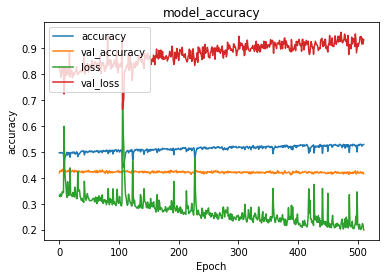

In [58]:
plt.plot(historial.history["accuracy"])
plt.plot(historial.history["val_accuracy"])
plt.plot(historial.history["loss"])
plt.plot(historial.history["val_loss"])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["accuracy","val_accuracy","loss","val_loss"])
plt.show()

Realice alguna predicción

In [43]:
#Acá su código

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f7f0e4b5250>>

# Conclusiones

En esta sección debería aportar sus conclusiones

Como conclusion pude evidenciar que se debe realizar un gran analisis respecto a los datos a analizar ya que en  un principio se hizo el preprocesamiento en base a lo que "crei" que seria necesario, dandome como resultado numeros muy erroneos y alejados de lo que esperaba, una vez realice un buen analisis y documente todos los errores que iba evidenciando pude llegar a un accuracy y un loss mejores de los que cuando empece.
en base al dataset pude evidenciar que este tenia muchos outliers y estos interrumpian en la prediccion.

como conclusion en base a mi trabajo pude evidenciar que es necesario realizar busquedas exhaustivas respecto a los datos a analizar y buscar modelos parecidos por ejemplo "arquitecturas de redes neuronales para prediccion de precios" las cuales me ayudaron a orientarme y a saber cuantas capas y neuronas poner, además de teoria sobre outliers, cuartiles y formulas para definir los limites inferior y superior.

Sin más que agregar se agradece el desafio que propuso la evaluacion y el reto que propone además agradecer al docente ya que sin ella, no hubiera podido tener las ganas ni la fuerza para realizar la evaluacion.